# London - Milestone Project
This project is based on a Kaggle dataset:
https://www.kaggle.com/edenau/london-bike-sharing-system-data

You actually have to retrieve to CSV files there **yourselves**!

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
# This won't work for you - at least not directly!
# It works now! Uploaded the data into the correct folder
df_stations = pd.read_csv("Data/stations.csv", index_col="Station ID")
df_journeys = pd.read_csv("Data/journeys.csv")

In [4]:
df_stations.head()

,Capacity,Latitude,Longitude,Station Name
Station ID,,,,
1,19,51.529163,-0.109970,"River Street , Clerkenwell"
2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"
4,23,51.530059,-0.120973,"St. Chad's Street, King's Cross"
5,27,51.493130,-0.156876,"Sedding Street, Sloane Square"


In [8]:
df_journeys.head()

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36


#### London Coordinates
51.5074° N, 0.1278° W

Make sure to correctly convert **N** and **W** when using with a map.

### 1a) Plot Journey Durations
In your journey data, you have the journey duration for all trips. Play around with the plotting tools we talked about - do **journey durations depend on the time of day?**

Text(0, 0.5, 'Journey Duration')

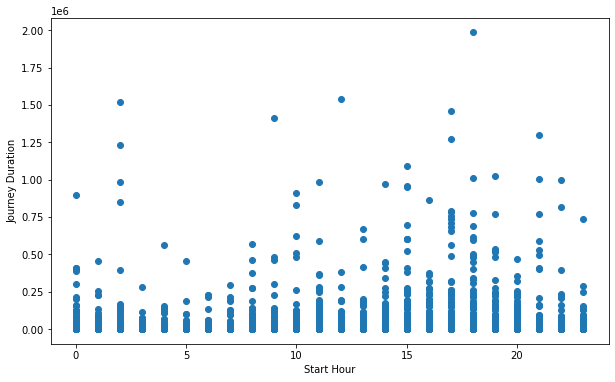

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_journeys['Start Hour'], y = df_journeys['Journey Duration'])
plt.xlabel("Start Hour")
plt.ylabel("Journey Duration")


Text(0, 0.5, 'Start Hour')

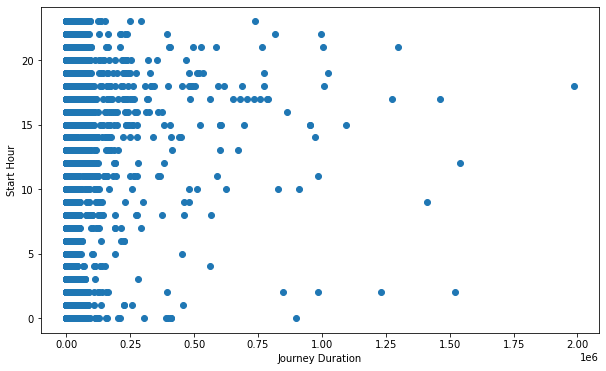

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_journeys['Journey Duration'], y = df_journeys['Start Hour'])
plt.xlabel("Journey Duration")
plt.ylabel("Start Hour")

### 1b) Predict Journey Durations
You have lot's of information for the trip. Use just the data that is known at the beginning of the trip (i.e., start time and start station) to predict the journy duration. Use any regression model your a comfortable with.

## At this point, I  started having a lot of problems...
I couldn't get the train/test split to work. I also had trouble understanding how to format the map. And finally, in order to add the station coordinates, it would have to be based on the station ID, and I couldn't figure out how to add a column where the the value comes from a column in another dataframe, which is based on the station ID column. Maybe I'm overthinking it?

I really tried though, hopefully we'll talk about it in class!

In [13]:
X = df_journeys[["Start Hour", "Start Station ID"]]
y = df_journeys["Journey Duration"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

NameError: name 'x' is not defined

In [15]:
x_train

NameError: name 'x_train' is not defined

In [ ]:
#WHY IS X_TRAIN NOT DEFINED??? WHAT DID I DO WRONG?

### 2a) Stations
In the "Folium" Notebook, I showed you how to create a colored map with some data. Try to create a similar map using the number of stations in the different boroughs of London (provided as GeoJson in this folder)

In [17]:
tiles = 'https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png'
attr = "Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL."
m = folium.Map(location = [51.5074, 0.1278], zoom_start=10, tiles=tiles, attr=attr)
m

In [21]:
folium.Choropleth(
    geo_data=f"data/boroughs.geojson",  # geojson file with spatial/geographical information
    data = df_stations,
    columns = ["Station Name", "Latitude"],
    fill_color='PuBuGn', # Find more here: https://github.com/dsc/colorbrewer-python
    fill_opacity = 0.5,
    line_opacity = 0.2)

### 2b) Coordinates
You know the stations' coordinates. Try to add two new columns to the journey DataFrame - Start Coordinate and End Coordinate

In [42]:
df_journeys["Latitude"] = df_stations["Latitude"]
df_journeys["Longitude"] = df_stations["Longitude"]
df_journeys

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID,Latitude,Longitude
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251,NaN,NaN
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550,51.529163,-0.109970
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212,51.499606,-0.197574
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163,51.521283,-0.084605
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36,51.530059,-0.120973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542839,270.0,5296,8,8,17,0,2,32,7,8,17,23,58,42,NaN,NaN
1542840,911.0,12348,8,8,17,0,13,625,7,8,17,23,58,222,NaN,NaN
1542841,447.0,8303,8,8,17,0,7,453,7,8,17,23,59,130,NaN,NaN
1542842,424.0,12038,8,8,17,0,6,405,7,8,17,23,59,755,NaN,NaN


In [46]:
df_journeys['Coordinates'] = df_journeys['Latitude'].map(str) + ', ' + df_journeys['Longitude'].map(str)
df_journeys

,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID,Latitude,Longitude,Coordinates
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251,NaN,NaN,"nan, nan"
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550,51.529163,-0.109970,"51.529163, -0.10997"
2,1140.0,1159,15,9,17,17,1,639,15,9,17,16,42,212,51.499606,-0.197574,"51.499606, -0.197574"
3,420.0,2375,14,9,17,12,16,755,14,9,17,12,9,163,51.521283,-0.084605,"51.521283, -0.084605"
4,1200.0,14659,13,9,17,19,33,605,13,9,17,19,13,36,51.530059,-0.120973,"51.530059, -0.120973"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542839,270.0,5296,8,8,17,0,2,32,7,8,17,23,58,42,NaN,NaN,"nan, nan"
1542840,911.0,12348,8,8,17,0,13,625,7,8,17,23,58,222,NaN,NaN,"nan, nan"
1542841,447.0,8303,8,8,17,0,7,453,7,8,17,23,59,130,NaN,NaN,"nan, nan"
1542842,424.0,12038,8,8,17,0,6,405,7,8,17,23,59,755,NaN,NaN,"nan, nan"


### 2c) Predict direction
Knowing the coordinate you can calculate it's distance to the city center (you just have to find out how!). Create two more columns in your journey DataFrame, Start Distance and End Distance. Based on these, create another column - direction - that indicates whether the journey is inbound (i.e., towards the city center), or outbound.
Use this column as target for a binary classification. As features, use only start time and start distance!

### Extra - Revisit 1b)
Using not only the start time (and Station ID), but also the start distance (from city center), does your regression for journey durations improve?

### Extra - Plotting
We have been talking quite a bit about beautiful visualizations. Try to be creative and create some! 